<h3> PROYEK ANALISIS DATA : E-Commerce Public Dataset

- Nama: Rasio Fernandis
- Email: rasiovolume22@gmail.com
- ID Dicoding: RASIO FERNANDIS

<h4>Menentukan Pertanyaan Bisnis<br><br>
Berikut adalah pertanyaan bisnis untuk analisis data pada dataset E-commerce public dataset :

1. berdasarkan data yang ada, bagaimana jumlah performa order status yang dilakukan oleh custommer dan berhasil dilakukan delivered pada tahun 2018? berikan kesimpulannya..

2. berdasarkan data yang ada, bagaimana jumlah estimasi pengantaran yang terlambat dan tepat waktu pada tahun 2018? dan berikan juga persentase hasilnya pada semua data?

3. Kategori produk manakah yang memiliki pendapatan tertinggi berdasarkan data yang diberikan, dan berapa total pendapatan yang diperoleh dari kategori tersebut?

4. Apakah memiliki hubungan antara status pengantaran (terlambat atau tepat waktu) terhadap skor ulasan (review_score) yang diberikan oleh custommer pada tahun 2018?

## <h4>Import Semua packages/Library yang digunakan

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <h3>DATA WRANGLING 

### <H5> GATHERING DATA

In [627]:
# variabel direktori file
lokasi = "data/"

In [628]:
# load dataset customers
customers_df = pd.read_csv(lokasi + "customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [629]:
# load dataset geolocation
geolocations_df = pd.read_csv(lokasi + "geolocation_dataset.csv")
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [630]:
# load dataset order items
items_df = pd.read_csv(lokasi + "order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [631]:
# load dataset order payments
payments_df = pd.read_csv(lokasi + "order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [632]:
# load dataset reviews
reviews_df = pd.read_csv(lokasi + "order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [633]:
# load dataset orders
orders_df = pd.read_csv(lokasi + "orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [634]:
# load dataset product kategory
category_product_df = pd.read_csv(lokasi + "product_category_name_translation.csv")
category_product_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [635]:
# load dataset product
products_df = pd.read_csv(lokasi + "products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [636]:
# load dataset sellers
sellers_df = pd.read_csv(lokasi + "sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### <H5> ASSESSING DATA

In [637]:
# CEK DATA INFO LANGSUNG SEMUA
# inisialisasi
data_seluruh = {
    'customers_df':customers_df,
    'geolocations_df':geolocations_df,
    'items_df':items_df,
    'payments_df':payments_df,
    'reviews_df':reviews_df,
    'orders_df':orders_df,
    'category_product_df':category_product_df,
    'products_df':products_df,
    'sellers_df':sellers_df,
}

In [638]:
# cek info tipe data pada datasetnya keseluruhan
for data, dataframe in data_seluruh.items():
    print('\n', data_seluruh[data].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [639]:
# cek data missing value keseluruhan
for data, datframe in data_seluruh.items():
    print('\n', data_seluruh[data].isna().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 order_id                            0
customer_id                       

In [640]:
# cek data duplikasi pada keseluruhan data
for data, datframe in data_seluruh.items():
    print('\n', data_seluruh[data].duplicated().sum())


 0

 261831

 0

 0

 0

 0

 0

 0

 0


In [641]:
# cek describe pada dataset items
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [642]:
# cek describe pada dataset payments
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [643]:
# cek describe pada dataset product
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### <H5> CLEANING DATA

In [644]:
# menangani kesalahan pada tipe data date terlebih dahulu pada items, review, orders
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  items_df[column] = pd.to_datetime(items_df[column])

datetime2_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime2_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

datetime3_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime3_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])


In [645]:
# cek perubahan datetime pada dataset items
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [646]:
# cek perubahan datetime pada dataset review
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [647]:
# cek perubahan datetime pada dataset orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### <h5>Dataset Reviews (Missing Value)

In [648]:
# cek data yang kosong pada kolom review_comment_title
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [649]:
# hapus isinya kolom review_comment_title yang kosong
reviews_df.dropna(subset=['review_comment_title'], inplace=True)

In [650]:
# isi data pada kolom review message
reviews_df.review_comment_message = np.where(reviews_df.review_comment_message.isnull(),0, 1)

In [651]:
# cek lagi perubahan sudah selesai belum
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### <h5>Dataset Orders (Missing Value)

In [652]:
# cek isi data pada data orders kolom order_status
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [653]:
# cek missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [654]:
# isi seperti nilai sebelumnya
orders_df.order_delivered_carrier_date = pd.to_datetime(orders_df.order_delivered_carrier_date, errors='coerce')  # Mengubah menjadi NaT jika invalid
orders_df.order_delivered_carrier_date = orders_df.order_delivered_carrier_date.fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_15308\2562353357.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df.order_delivered_carrier_date = orders_df.order_delivered_carrier_date.fillna(method='ffill')


In [655]:
orders_df.order_approved_at = pd.to_datetime(orders_df.order_approved_at, errors='coerce')  # Mengubah menjadi NaT jika invalid
orders_df.order_approved_at = orders_df.order_approved_at.fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_15308\460874382.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df.order_approved_at = orders_df.order_approved_at.fillna(method='ffill')


In [656]:
orders_df.order_delivered_customer_date  = pd.to_datetime(orders_df.order_delivered_customer_date , errors='coerce')  # Mengubah menjadi NaT jika invalid
orders_df.order_delivered_customer_date  = orders_df.order_delivered_customer_date .fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_15308\1604132752.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df.order_delivered_customer_date  = orders_df.order_delivered_customer_date .fillna(method='ffill')


In [657]:
# cek lagi memastikan bahwa sudah bersih
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [658]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### <h5>Dataset Product (Missing Value)

In [659]:
# cek missing value lagi
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [660]:
products_df.dropna(subset=['product_weight_g'], inplace=True)
products_df.dropna(subset=['product_length_cm'], inplace=True)
products_df.dropna(subset=['product_height_cm'], inplace=True)
products_df.dropna(subset=['product_width_cm'], inplace=True)

In [661]:
# isi data produk category nama
products_df.product_category_name.fillna(value='outro', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15308\3147738945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value='outro', inplace=True)


In [662]:
# product_photos_qty isi dengan 0
products_df.product_photos_qty.fillna(value=0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15308\291810466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_photos_qty.fillna(value=0, inplace=True)


In [663]:
# isi product_name_lenght dengan modus
mode_Lenght = products_df.product_name_lenght.mode()[0]
products_df.product_name_lenght = products_df.product_name_lenght.fillna(mode_Lenght)

In [664]:
# isi product_description_lenght dengan modus
mode_Des_Lenght = products_df.product_description_lenght.mode()[0]
products_df.product_description_lenght = products_df.product_description_lenght.fillna(mode_Des_Lenght)

In [665]:
# cek missing value lagi
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### <h5>Dataset Geolocation (Duplicate)

In [666]:
geolocations_df.drop_duplicates(inplace=True)

In [667]:
# cek data sudah hilang duplikat data 
geolocations_df.duplicated().sum()

np.int64(0)

Sudah melakukan cleaning data

## <H3> EDA (EXPLORATORY DATA ANALYSIS)

### <H5> EXPLORE DATA

### <H5> EXPLORE DATA CUSTOMERS

In [668]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [669]:
# menampilkan berdasarkan customer_city
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique",
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [670]:
# menampilkan berdasarkan customer_state
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### <H5> EXPLORE DATA GEOLOCATION

In [671]:
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [672]:
# menampilkan berdasarkan geolocation_city
geolocations_df.groupby(by="geolocation_city").agg({
    "geolocation_zip_code_prefix": "nunique",
})

,geolocation_zip_code_prefix
geolocation_city,
* cidade,1
...arraial do cabo,1
4o. centenario,1
4º centenario,1
abadia de goias,1
...,...
áurea,1
ângulo,1
érico cardoso,1


### <H5> EXPLORE DATA ITEMS

In [673]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [674]:
# belum bisa di ekplor lebih karena banyak id relasi
items_df.groupby(by="order_item_id").agg({
    "order_item_id": ["count"]
})

,order_item_id
,count
order_item_id,
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36


### <H5> EXPLORE DATA PAYMENTS

In [675]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [676]:
# menampilkan eksplorasi dataset payment
payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean"]
})

order_id payment_value                   
              nunique           max    min        mean
payment_type                                          
boleto          19784       7274.88  11.62  145.034435
credit_card     76505      13664.08   0.01  163.319021
debit_card       1528       4445.50  13.38  142.570170
not_defined         3          0.00   0.00    0.000000
voucher          3866       3184.34   0.00   65.703354

In [677]:
# jika tampilan diurutkan dari yang paling besar bersarkan orderan
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### <H5> EXPLORE DATA REVIEWS

In [678]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,1,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,1,2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,1,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,1,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,1,2018-06-07,2018-06-09 18:44:02


In [679]:
# menampilkan eksplorasi dataset review
reviews_df.groupby(by="review_score").agg({
    "review_score": ["count"]
})

,review_score
,count
review_score,
1,1873
2,478
3,824
4,1735
5,6658


### <H5> EXPLORE DATA ORDERS

In [680]:
orders_df.groupby(by="order_status").agg({
    "order_status": ["count"]
})

,order_status
,count
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


### <H5> EXPLORE DATA CUSTOMERS DAN ORDER

In [681]:
# menggabungkan antar tabel dataset dengan merge dari customer_id
customers_orders_df= pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### <H5> EXPLORE DATA REVIEW AND PAYMENT

In [682]:
# menggabungkan antar tabel dataset dengan merge dari order_id
reviews_payments_df = pd.merge(
    left=reviews_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
reviews_payments_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,1,2018-05-22,2018-05-23 16:45:47,1,credit_card,8,613.25
1,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,1,2018-05-23,2018-05-24 03:00:01,1,credit_card,1,103.06
2,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,1,2018-08-15,2018-08-15 04:10:37,1,credit_card,2,99.28
3,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,1,2018-07-10,2018-07-11 14:10:25,1,credit_card,2,65.24
4,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,1,2018-06-07,2018-06-09 18:44:02,1,credit_card,1,56.96


In [683]:
# mengurutkan data dengan descending
reviews_payments_df.sort_values(by="payment_value", ascending=False)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
2331,6b9a600f1bb824da4ca38f65baf42526,736e1922ae60d0d6a89247b851902527,1,Entrega incompleta,1,2018-07-27,2018-07-28 02:36:10,1,boleto,1,7274.88
10977,5740810e4d16fe8fc6a1b959558f63a5,8dbc85d1447242f3b127dda390d56e19,5,Satisfeito,1,2018-07-06,2018-07-06 21:30:22,1,credit_card,8,4681.78
9035,f0adde0530cf39af28b8c82fc950c9fd,cb418bb4b6115438d20b0141ed5bc9e0,1,Entrega parcial do pedido,1,2018-06-17,2018-06-18 01:41:48,1,credit_card,3,3256.14
8695,b00226ada6d8fc0b12d3639eb2aac021,912343626f370ead5ef2e85a9d757e22,3,falta item,1,2018-06-16,2018-06-17 05:33:13,1,credit_card,10,3242.84
10295,b1ac3807c5f1a202334cd3e1e795a2c8,1d54db601b417ccdfd3b7071955e6cc7,5,Otimo vendedor.,0,2018-05-04,2018-05-07 10:11:32,1,credit_card,5,3209.72
...,...,...,...,...,...,...,...,...,...,...,...
9160,96890a35fa67a65ed002dfbf0bc7645b,9cd6015fc7c3321b8cfc4459af284790,5,Melhor do que eu imaginei,1,2018-07-03,2018-07-06 15:29:09,1,credit_card,1,0.13
6828,1410cb0d9cce05447ef31c905802a5df,d8c4293616878e2f015351d8f1445880,5,Recomendo,1,2018-06-16,2018-06-17 11:00:56,1,credit_card,1,0.05
11179,b54d02f7f1520b3995f84b77ab0dacb3,c8c528189310eaa44a745b8d9d26908b,1,Péssima meu produtdefeito,0,2018-08-24,2018-08-25 02:24:54,1,not_defined,1,0.00
1124,9c0d840dfe562debfa52a1792bd64bff,00b1cb0320190ca0daa2c88b35206009,1,Entregaram produto errado,1,2018-08-28,2018-08-28 18:25:55,1,not_defined,1,0.00


In [684]:
# melakukan eksplore lagi menampilkan min max data payment value
reviews_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value         
              nunique           min      max
payment_type                                
boleto           2115         15.38  7274.88
credit_card      8891          0.05  4681.78
debit_card        334         18.30  2512.53
not_defined         3          0.00     0.00
voucher           434          0.15  3184.34

### <H5> EXPLORE REVIEW_PAYMENTS dengan CUSTOMERS ORDER 

In [685]:
# melakuan eksplore dengan dataset tersebut
customerss_df = pd.merge(
    left=reviews_payments_df,
    right=customers_orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customerss_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,1,2018-05-22,2018-05-23 16:45:47,1,credit_card,8,...,2bf6fd4ad93eb21b3d604481c48decbf,1306,sao paulo,SP,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06
1,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,1,2018-05-23,2018-05-24 03:00:01,1,credit_card,1,...,57b1099bb38ee91578d2f1c3ee154082,7055,guarulhos,SP,delivered,2018-05-18 18:20:45,2018-05-18 18:35:28,2018-05-19 09:27:00,2018-05-22 14:58:47,2018-06-07
2,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,1,2018-08-15,2018-08-15 04:10:37,1,credit_card,2,...,cdbbafa842e30d5e79dcef5bdc118831,7175,guarulhos,SP,canceled,2018-08-04 19:25:07,2018-08-05 19:24:33,2018-02-01 00:19:02,2018-02-20 19:07:33,2018-08-13
3,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,1,2018-07-10,2018-07-11 14:10:25,1,credit_card,2,...,a2b04fc2ec07fc6fbbdfbf8fd1fe5a30,27345,barra mansa,RJ,delivered,2018-07-04 20:34:57,2018-07-05 16:33:00,2018-07-05 15:55:00,2018-07-09 20:27:50,2018-07-23
4,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,1,2018-06-07,2018-06-09 18:44:02,1,credit_card,1,...,f51a647a551b866c440921b7f2b5683f,41230,salvador,BA,delivered,2018-05-18 12:15:11,2018-05-18 13:05:53,2018-05-21 16:13:00,2018-06-06 18:22:40,2018-06-14


### <H5> EXPLORE ITEMS DENGAN SELLERS

In [686]:
# manampilkan data merge antara items dengan sellers
items_sellers_df = pd.merge(
    left=items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [687]:
# menampilkan dengan sort data dari kolom seller_city
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [688]:
# menampilkan data dengan sort dari kolom seller_state
items_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### <H5> EXPLORE PRODUCTS DENGAN CATEGORY PRODUCTS

In [689]:
# melakukan gabungan atau merge
products_df = pd.merge(
    left=products_df,
    right=category_product_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [690]:
# coba tes lagi menampilkan dengan melakukan sort descending
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

### <H5> EXPLORE ITEMS SELLERS DENGAN PRODUCTS

In [691]:
sellerss_df = pd.merge(
    left=products_df,
    right=items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellerss_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [692]:
# manampilkan mengurutkan berdasrkan harga atau price descending
sellerss_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73904,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49502,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71817,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32231,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,1,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9326,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,18,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29607,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG


In [693]:
# manampilkan mengurutkan berdasrkan harga atau price ascending
sellerss_df.sort_values(by="price", ascending=True)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
29609,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29607,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
55904,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,5,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55905,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,6,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32231,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
71817,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
49502,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
73904,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR


### <H5> EXPLORE GEOLOCATION

In [694]:
# menampilkan urutan sesuai dengan geolocation_zip_code_prefix
geolocations_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

In [695]:
geolocations_df[geolocations_df.geolocation_zip_code_prefix == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### <H5> PENGGABUNGAN SEMUA DATA UNTUK ANALISIS DAN VISUALISASI

In [696]:
# penggabungan data
all_data = pd.merge(
    left=customerss_df,
    right=sellerss_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,1,2018-05-22,2018-05-23 16:45:47,1,credit_card,8,...,24.0,small_appliances,1.0,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,26.69,98803.0,santo angelo,RS
1,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,1,2018-05-23,2018-05-24 03:00:01,1,credit_card,1,...,15.0,computers_accessories,1.0,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,13.07,14802.0,araraquara,SP
2,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,1,2018-08-15,2018-08-15 04:10:37,1,credit_card,2,...,35.0,luggage_accessories,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-08-08 19:24:33,89.90,9.38,4461.0,sao paulo,SP
3,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,1,2018-07-10,2018-07-11 14:10:25,1,credit_card,2,...,11.0,health_beauty,1.0,8b2492b7ff4468839593fafeed55bad9,2018-07-08 21:31:40,51.67,13.57,24451.0,sao goncalo,RJ
4,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,1,2018-06-07,2018-06-09 18:44:02,1,credit_card,1,...,16.0,sports_leisure,1.0,bd15ee794d5e640d9dd71b665b2ab15b,2018-05-24 13:05:53,34.90,22.06,14078.0,ribeirao preto,SP


In [697]:
all_data_df = all_data.drop_duplicates('order_id')

In [698]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11553 entries, 0 to 13988
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      11553 non-null  object        
 1   order_id                       11553 non-null  object        
 2   review_score                   11553 non-null  int64         
 3   review_comment_title           11553 non-null  object        
 4   review_comment_message         11553 non-null  int64         
 5   review_creation_date           11553 non-null  datetime64[ns]
 6   review_answer_timestamp        11553 non-null  datetime64[ns]
 7   payment_sequential             11553 non-null  int64         
 8   payment_type                   11553 non-null  object        
 9   payment_installments           11553 non-null  int64         
 10  payment_value                  11553 non-null  float64       
 11  customer_id         

In [699]:
# menampilkan disertai mengurutkan dengan descending berdasarkan customer state
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,5042,756297.11
RJ,1461,254285.43
MG,1232,211634.97
PR,508,102568.30
RS,518,94568.67
BA,459,89905.79
SC,344,80027.53
DF,252,50962.69
PE,236,49907.43


In [700]:
# konversi datetime
all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'], format='%d/%m/%Y', errors='coerce')
all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')

# Melabelkan terlambat atau tidak terlambat
all_data_df['delivery_status'] = all_data_df.apply(
    lambda row: 'Terlambat' if row['order_delivered_customer_date'] > row['order_estimated_delivery_date'] else 'Tepat Waktu',
    axis=1
)

C:\Users\User\AppData\Local\Temp\ipykernel_15308\2870494313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_15308\2870494313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')
C:\Users\User\App

### <H5> EKSPORT FILE JADI CSV

In [701]:
# # eksport
# output_csv_path = "dashboard/main_data.csv"

# all_data_df.to_csv(output_csv_path, index=False)

## <H3> VISUALIZATION DAN EXPLANATORY ANALYSIS

1. berdasarkan data yang ada, bagaimana jumlah performa order status yang dilakukan oleh custommer dan berhasil dilakukan delivered pada tahun 2018? berikan kesimpulannya..

C:\Users\User\AppData\Local\Temp\ipykernel_15308\1337332821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')


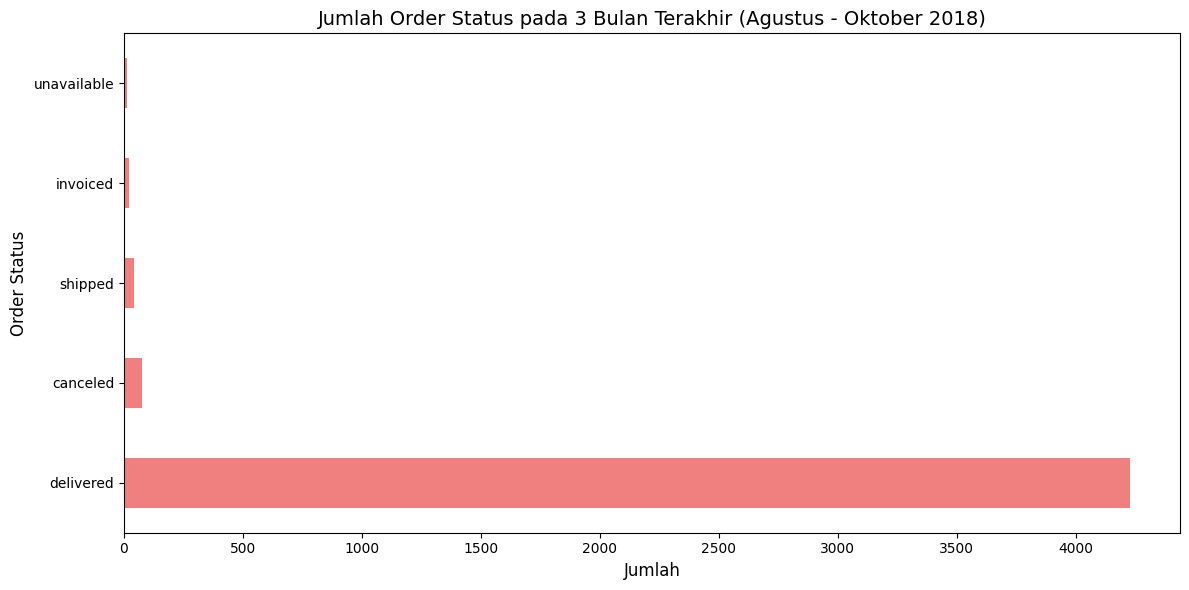

In [702]:
# Convert 'order_estimated_delivery_date' ke datetime
all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')

# Tentukan tanggal akhir sebagai acuan (misal: 31 oktober 2018)
end_date = pd.Timestamp('2018-10-31')

# Filter data untuk 3 bulan sebelumnya (agustus, september, oktober)
start_date = end_date - pd.DateOffset(months=3)
filtered_data = all_data_df[(all_data_df['order_estimated_delivery_date'] >= start_date) & 
                            (all_data_df['order_estimated_delivery_date'] <= end_date)]

# Hitung jumlah order_status untuk jumlahnya 3 bulan terakhir
order_status_count = filtered_data['order_status'].value_counts()

plt.figure(figsize=(12, 6))
order_status_count.plot(kind='barh', color='lightcoral')
plt.title('Jumlah Order Status pada 3 Bulan Terakhir (Agustus - Oktober 2018)', fontsize=14)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Order Status', fontsize=12)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()


2. berdasarkan data yang ada, bagaimana jumlah estimasi pengantaran yang terlambat dan tepat waktu semua data tahun 2017 dan 2018? dan berikan juga persentase hasilnya?

C:\Users\User\AppData\Local\Temp\ipykernel_15308\2265865162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'], format='%d/%m/%Y', errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_15308\2265865162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')
C:\Users\User\App

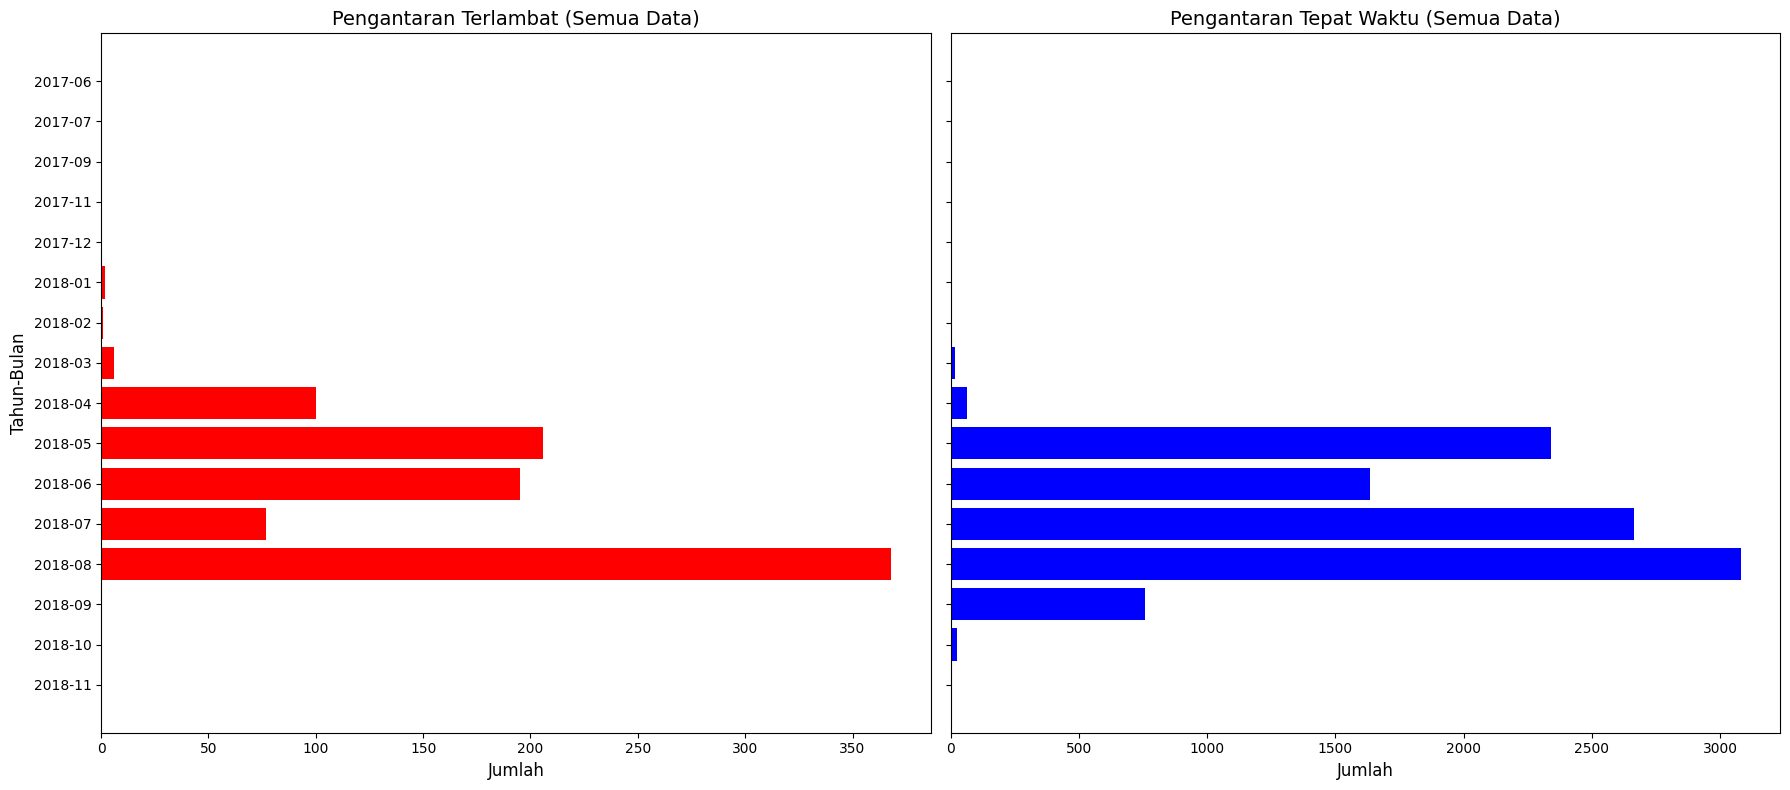

In [703]:

# konversi datetime
all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'], format='%d/%m/%Y', errors='coerce')
all_data_df['order_estimated_delivery_date'] = pd.to_datetime(all_data_df['order_estimated_delivery_date'], format='%d/%m/%Y')

# Melabelkan terlambat atau tidak terlambat
all_data_df['delivery_status'] = all_data_df.apply(
    lambda row: 'Terlambat' if row['order_delivered_customer_date'] > row['order_estimated_delivery_date'] else 'Tepat Waktu',
    axis=1
)

# semua data
filtered_data = all_data_df.copy() 

# Tambahkan kolom tahun-bulan untuk perhitungan bulanan
filtered_data['year_month'] = filtered_data['order_estimated_delivery_date'].dt.to_period('M')

# Hitung jumlah terlambat dan tidak terlambat per bulan
status_counts = filtered_data.groupby(['year_month', 'delivery_status']).size().unstack(fill_value=0)

# Memisahkan data terlambat dan tidak terlambat
late_counts = status_counts['Terlambat']
on_time_counts = status_counts['Tepat Waktu']

# Membuat dua grafik batang horizontal (kiri dan kanan)
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Grafik "Terlambat"
ax[0].barh(late_counts.index.astype(str), late_counts, color='red')
ax[0].set_title('Pengantaran Terlambat (Semua Data)', fontsize=14)
ax[0].set_xlabel('Jumlah', fontsize=12)
ax[0].set_ylabel('Tahun-Bulan', fontsize=12)
ax[0].invert_yaxis()

# Grafik "Tepat Waktu"
ax[1].barh(on_time_counts.index.astype(str), on_time_counts, color='blue')
ax[1].set_title('Pengantaran Tepat Waktu (Semua Data)', fontsize=14)
ax[1].set_xlabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()


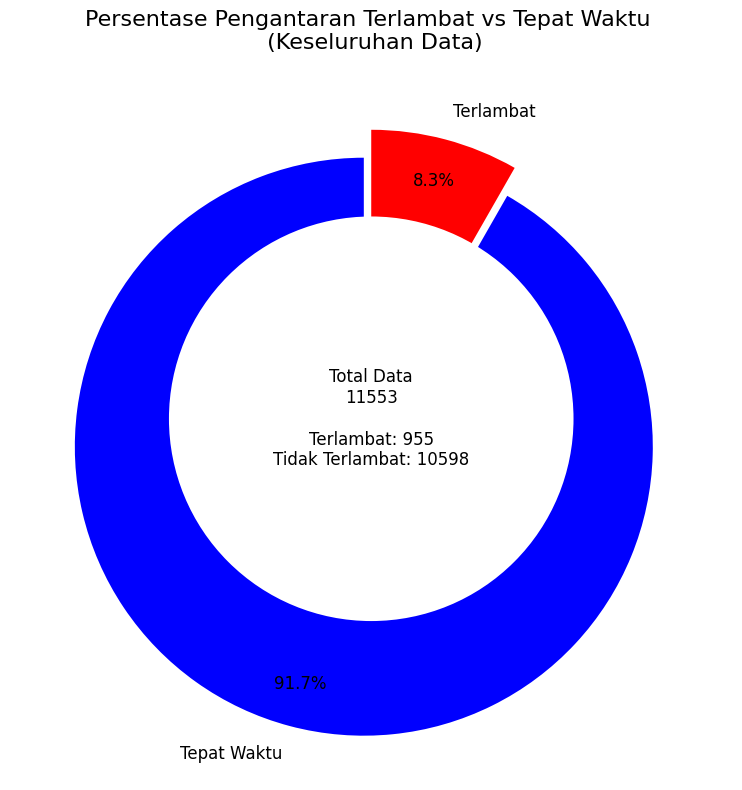

In [704]:
# Hitung total jumlah terlambat dan tidak terlambat dari keseluruhan data
total_counts = all_data_df['delivery_status'].value_counts()

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Data untuk pie chart
labels = total_counts.index
sizes = total_counts.values
colors = ['blue', 'red']
explode = (0.1, 0)  # Menonjolkan bagian "Terlambat"

# Membuat grafik pie
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    explode=explode, 
    textprops={'fontsize': 12},
    pctdistance=0.85)

# Tambahkan lingkaran putih di tengah untuk membuat efek "doughnut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Tambahkan jumlah data total di tengah pie chart
total_text = f"Total Data\n{total_counts.sum()}\n\nTerlambat: {total_counts['Terlambat']}\nTidak Terlambat: {total_counts['Tepat Waktu']}"
plt.annotate(
    total_text, 
    xy=(0, 0), 
    fontsize=12, 
    ha='center', 
    va='center', 
    color='black'
)

# Menyesuaikan layout
plt.title('Persentase Pengantaran Terlambat vs Tepat Waktu \n (Keseluruhan Data)', fontsize=16)
plt.tight_layout()
plt.show()

3. Kategori produk manakah yang memiliki pendapatan tertinggi berdasarkan data yang diberikan, dan berapa total pendapatan yang diperoleh dari kategori tersebut?

C:\Users\User\AppData\Local\Temp\ipykernel_15308\4116741506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['total_revenue'] = all_data_df['price']  # karena asumsinya 1 produk per transaksi


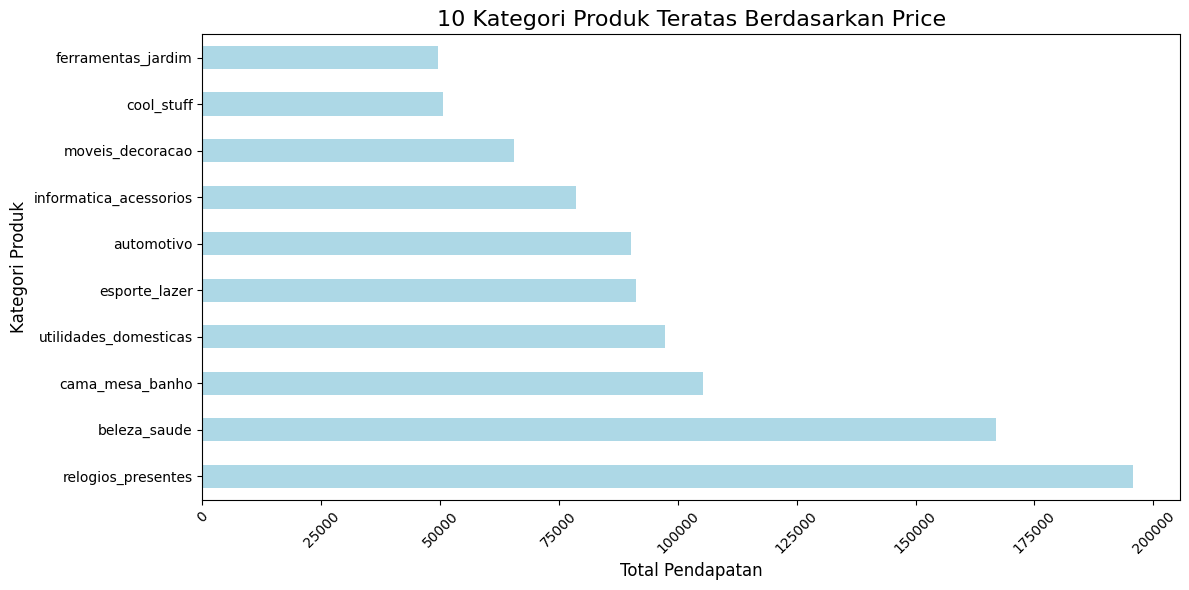

product_category_name
relogios_presentes        195829.08
beleza_saude              166901.05
cama_mesa_banho           105279.55
utilidades_domesticas      97204.71
esporte_lazer              91156.41
automotivo                 90069.23
informatica_acessorios     78571.48
moveis_decoracao           65620.75
cool_stuff                 50534.35
ferramentas_jardim         49521.64
Name: total_revenue, dtype: float64


In [705]:
# Hitung total pendapatan per kategori produk (asumsi: satu unit per transaksi)
all_data_df['total_revenue'] = all_data_df['price']  # karena asumsinya 1 produk per transaksi

# Jumlahkan total pendapatan per kategori produk
category_revenue = all_data_df.groupby('product_category_name')['total_revenue'].sum().sort_values(ascending=False)

# Ambil 10 kategori produk teratas berdasarkan pendapatan
top_10_categories = category_revenue.head(10)

# Plot grafik batang
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='barh', color='lightblue')
plt.title('10 Kategori Produk Teratas Berdasarkan Price', fontsize=16)
plt.xlabel('Total Pendapatan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(axis='y')
plt.show()

# Menampilkan 10 kategori produk teratas dalam bentuk tabel
print(top_10_categories)


4. Apakah memiliki hubungan antara status pengantaran (terlambat atau tepat waktu) terhadap skor ulasan (review_score) yang diberikan oleh custommer pada tahun 2018?

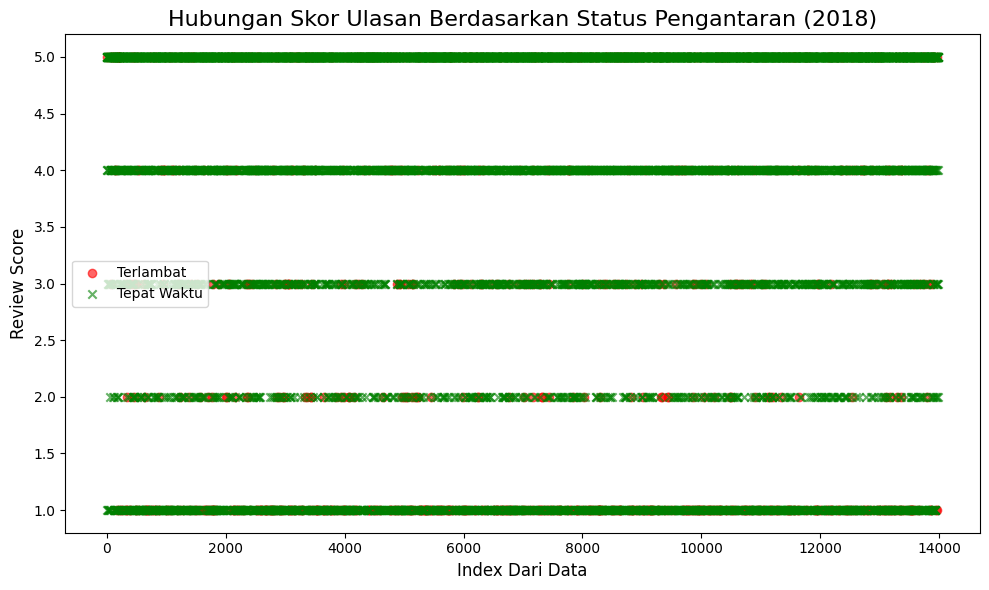

In [706]:
# Scatter plot for review scores based on delivery status
plt.figure(figsize=(10, 6))

# Scatter plot for "Terlambat" deliveries
plt.scatter(filtered_data[filtered_data['delivery_status'] == 'Terlambat'].index,
            filtered_data[filtered_data['delivery_status'] == 'Terlambat']['review_score'],
            label='Terlambat', color='red', alpha=0.6, marker='o')

# Scatter plot for "Tepat Waktu" deliveries
plt.scatter(filtered_data[filtered_data['delivery_status'] == 'Tepat Waktu'].index,
            filtered_data[filtered_data['delivery_status'] == 'Tepat Waktu']['review_score'],
            label='Tepat Waktu', color='green', alpha=0.6, marker='x')

# Adding title and labels
plt.title('Hubungan Skor Ulasan Berdasarkan Status Pengantaran (2018)', fontsize=16)
plt.xlabel('Index Dari Data', fontsize=12)
plt.ylabel('Review Score', fontsize=12)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [707]:
delayed_low_reviews = filtered_data[
    (filtered_data['delivery_status'] == 'Tepat Waktu') & 
    (filtered_data['review_score'].isin([2]))
]

# Menampilkan data yang sesuai dengan filter
print(delayed_low_reviews)

                              review_id                          order_id  \
58     f3401a1de0c152923ba58cf7b7d2b84a  a848ecb46fe108b35dd5bd7bf4fdddca   
96     bde05133984518116b3d77d994e375d3  2a743fc30067036b7910663ced5a0b7b   
118    d8d62030afbc777000b61bdfc7312939  14a05c02d483800864e5c19a3a7f0ee2   
169    44bb8c2ad3bb9c2bb3552a034eeffc4c  56c79c2be1ceff5839d56e340e847833   
185    3547ade529a1b5a5e093456476b22c58  d8721b9f395286c3b43ff47a250ad40a   
...                                 ...                               ...   
13903  18215615f60e6771c00faaaa1ade4cea  743277e5089af7df0cbd543c93e5d852   
13932  4ae065a9ed27676994e75f0f0f3bab4c  42b4cc626bcba589ae76151155a70a19   
13940  52baca75dbcbb53c69ae3e39e4632675  e38ff07f7864e8fd4fd51687cba79d89   
13968  61249dd0992d25082ab94464a2a47668  2437dfd68fb453ad27e1898c8b1fe868   
13988  2ee221b28e5b6fceffac59487ed39348  f2d12dd37eaef72ed7b1186b2edefbcd   

       review_score  review_comment_title  review_comment_message  \
58    

## <H2> KESIMPULAN

1. berdasarkan data yang ada, bagaimana jumlah performa order status yang dilakukan oleh custommer dan berhasil dilakukan delivered pada 3 bulan terakhir tahun 2018? berikan kesimpulannya..
>berdasarkan hasil yang sudah dilakukan visualisasi dapat disimpulkan bahwa jumlah order status custommer dan berhasil selesai diantarkan atau delivered lebih banyak daripada lainnya pada 3 bulan di tahun 2018. dengan arti dapat dikatakan bahwa sudah sangat baik.

2. berdasarkan data yang ada, bagaimana jumlah estimasi pengantaran yang terlambat dan tepat waktu pada tahun 2017 dan 2018? dan berikan juga persentase hasilnya pada semua data?
>berdasarkan data sudah dilakukan pelabelan setiap data dikategorikan terlambat dan tepat waktu dalam estimasi pengantaran pada semua data. dapat disimpulkan bahwa hasil visualisasi menunjukkan pengantaran tepat waktu sangat lebih banyak dibandingkan yang terlambat. dimana pengantaran tepat waktu paling banyak terjadi pada 08-2018 lebih dari 3000, sedangkan pengantaran paling banyak terlambat pada 08-2018 hanya lebih 350. 
>hasil persentase terlambat sebesar 8.3% dan tepat waktu 91.7%
>selain itu dalam analisis terdapat faktor lain-lainnya dalam pengantaran yang menyebabkan pengantaran menjadi terlambat.

3. Kategori produk manakah yang memiliki pendapatan tertinggi berdasarkan data yang diberikan, dan berapa total pendapatan yang diperoleh dari kategori tersebut?
>hasil kategori produk dengan pendapatan atau price tertinggi pada relogios_presentes dengan total 195829.08, setelah itu tertinggi ke 2 yaitu beleza_saude dan seterusnya..

4. Apakah memiliki hubungan antara status pengantaran (terlambat atau tepat waktu) terhadap skor ulasan (review_score) yang diberikan oleh custommer pada tahun 2018?
>tidak memiliki hubungan atau bisa disebut pola menyebar, dimana hasil terlambat ataupun tepat waktu juga terdapat masing-masing memiliki review score 1-5. meskipun hasil tepat waktu memilih review score 3 keatas lebih banyak, namun terlambat juga terdapat pilihan tersebut yang sama. dengan pola penyebarannya rata.